#  Netflix Dataset
The dataset consists of a list of all the TV shows/movies available on Netflix

## Importing the libraries utilized for Data Exploration and Analysis:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


## Loading and previewing the dataset

In [ ]:
df=pd.read_csv('netflix.csv')
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic stats of the dataframe:


In [ ]:
print(f"Total Number of rows: {df.shape[0]}")
print(f"Total Number of columns: {df.shape[1]}")

Total Number of rows: 8807
Total Number of columns: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We can notice that this dataset contains only one numerical column, release_year. We can see that the first movie available was released in 1925 and the latest movie was released in 2021.

## Data Cleaning
### Examination of missing values by column:

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


From the above table, we can observe that the columns director, cast, country, date_added, rating, and duration have missing values.

In [ ]:
print(f"Total Number of Missing Values: {df.isna().sum().sum()}")


Total Number of Missing Values: 4307


## Handling Missing Values :



In [ ]:
df['director'].fillna('Not Specified', inplace=True)

In the above code, we are labeling the missing director names in the dataset as "Not Specified". We will label missing values in Cast, Country, rating columns accordingly :

In [ ]:
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('NR', inplace=True) #Labeling missing Rating in the dataset as "NR" which stands for "Not Rated."


Let us delete the rows with missing values in the date_added column to ensure accurate analysis of content release timelines :

In [ ]:
df.dropna(subset=['date_added'],inplace=True) #deletes the rows with missing values in the date_added column

Let us check for the missing values in the duration column :

In [ ]:
ind=df[df['duration'].isna()].index
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We can see from the above table that the duration information has been incorrectly placed under the rating column. We must shift their values to duration column and address any missing values in the rating column to maintain data accuracy.

In [ ]:
df.loc[ind,'duration']=df.loc[ind,'rating']
df.loc[ind,'rating']='NR' # renaming the cells from rating column as NR after shifting their values to rating column
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...


## Identifying Redundant Records in the Dataset :

In [ ]:
print(f"Total number of duplicates in the dataset : {df.duplicated().sum()}")

Total number of duplicates in the dataset : 0


## Standardizing Date Format

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed', errors='coerce').dt.strftime('%d-%m-%Y')


## Creating New Columns for 'Month Added' and 'Year Added' for Detailed Analysis



In [ ]:
df['date_added_year'] = pd.to_datetime(df['date_added'], format='mixed').dt.year
df['date_added_month'] = pd.to_datetime(df['date_added'], format='mixed').dt.strftime('%B')
df.head() # we can see that two new columns have been added

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,25-09-2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-09-2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,24-09-2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Available,Unknown,24-09-2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-09-2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


## Data Exploration and Non Graphical Analysis

* ### Unique values, count of unique values and frequency of unique values in the dataset :

In [ ]:
print(f"Total number of unique titles in the dataset : {df['title'].nunique()}")
print("-" *45)
print(f"Unique directors in the dataset:{df['director'].unique()}")
print("-" *45)
print(f"Total number of unique directors in the dataset: {df['director'].nunique()}")
print("-" *45)
print(f"Unique types in the dataset: \n {df['type'].unique()}")
print("-" *45)
print(f"Type frequency in the Dataset:\n {df['type'].value_counts()}")

Total number of unique titles in the dataset : 8797
---------------------------------------------
Unique directors in the dataset:['Kirsten Johnson' 'Not Specified' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
---------------------------------------------
Total number of unique directors in the dataset: 4529
---------------------------------------------
Unique types in the dataset: 
 ['Movie' 'TV Show']
---------------------------------------------
Type frequency in the Dataset:
 type
Movie      6131
TV Show    2666
Name: count, dtype: int64


From the above output, we can see that the dataset contains a total of 8797 unique titles, 4529 unique Directors, and 2 unique types, having 6,131 movies and 2,666 TV shows.

In [ ]:
movies=df.loc[df['type']=='Movie']
tv_show=df.loc[df['type']=='TV Show']
print(f"Frequency of movie duration:\n {movies['duration'].value_counts()}")
print("-" *45)
print(f"Frequency of TV show duration:\n {tv_show['duration'].value_counts()}")

Frequency of movie duration:
 duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64
---------------------------------------------
Frequency of TV show duration:
 duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64


 Since TV show has seasons and its format for duratrion is different, we can change duration for movies as minutes & TV shows as seasons :

In [ ]:
movies['duration']=movies['duration'].str[:-3]
movies['duration']=movies['duration'].astype(int)
tv_show['duration']=tv_show['duration'].str[:-7]
tv_show['duration']=tv_show['duration'].astype(int)
tv_show.rename(columns={'duration':'duration_in_seasons'},inplace=True)
movies.rename(columns={'duration':'duration_in_minutes'},inplace=True)


In [ ]:
tv_show.duration_in_seasons

,duration_in_seasons
1,2
2,1
3,1
4,2
5,1
...,...
8795,2
8796,2
8797,3
8800,1


In [ ]:
movies.duration_in_minutes

,duration_in_minutes
0,90
6,91
7,125
9,104
12,127
...,...
8801,96
8802,158
8804,88
8805,88


 * ### The oldest and the most recent Movies and TV shows available in the dataset :

In [ ]:
print(f"Oldest Movie was released on: {movies['release_year'].min()}")
print(f"Oldest TV Show was released on: {tv_show['release_year'].min()}")

Oldest Movie was released on: 1942
Oldest TV Show was released on: 1925


In [ ]:
print(f"Most recent Movie was released on: {movies['release_year'].max()}")
print(f"Most recent TV Show was released on: {tv_show['release_year'].max()}")

Most recent Movie was released on: 2021
Most recent TV Show was released on: 2021



* ### Various types of ratings and the number of titles released in each type in the Netflix datastet :

In [ ]:
df.groupby(['type','rating'])['show_id'].count()

type     rating  
Movie    G             41
         NC-17          3
         NR            80
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             6
         R              2
         TV-14        730
         TV-G          94
         TV-MA       1143
         TV-PG        321
         TV-Y         175
         TV-Y7        194
         TV-Y7-FV       1
Name: show_id, dtype: int64

### Columns with comma separated values for each record and columns having maximum null values :

 * Country column :









In [ ]:
df['country'].value_counts()

,count
country,
United States,2812
India,972
Unknown,830
United Kingdom,418
Japan,244
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


From the above table, we can observe that certain movies have been produced by multiple countries, making it difficult to analyse how many movies were produced in each country. We can use explode function in pandas to split the country into different columns.

In [ ]:
country=df[['show_id','type','country']]  # creating a new table 'country' for further analysis,
# to avoid duplicacy
country.dropna(inplace=True)
country['country']=country['country'].apply(lambda x : x.split(','))
country=country.explode('country')
country

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,Unknown
3,s4,TV Show,Unknown
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,Unknown
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country['country']=country['country'].str.strip() # removing unnecessary space

In [ ]:
a=country.loc[country['country']=='']
a


,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


We can see that the above movies have no information about the countries. Let us get information about only the movies that have country information in them :

In [ ]:
country=country.loc[country['country']!='']
print(f"Number of unique countries in the dataset: {country['country'].nunique()}")

Number of unique countries in the dataset: 123


### Total movies and TV shows in each country :

In [ ]:
x = country.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Unknown,440.0,390.0
Canada,319.0,126.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


* Director column

In [ ]:
df['director'].value_counts()

,count
director,
Not Specified,2624
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


In [ ]:
dir = df[['show_id' , 'type' , 'director']]
dir.dropna(inplace = True)
dir['director'] = dir['director'].apply(lambda x : x.split(','))
dir

,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
1,s2,TV Show,[Not Specified]
2,s3,TV Show,[Julien Leclercq]
3,s4,TV Show,[Not Specified]
4,s5,TV Show,[Not Specified]
...,...,...,...
8802,s8803,Movie,[David Fincher]
8803,s8804,TV Show,[Not Specified]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [ ]:
dir = dir.explode('director')
dir['director'] = dir['director'].str.strip()
# checking if empty stirngs are there in director column
dir.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

,count
director,
False,9602


In [ ]:
print(f"Total number of unique directors: {dir['director'] .nunique()}")

Total number of unique directors: 4994


### Total movies and TV shows dorected by each director :

In [ ]:
x=dir.groupby(['director','type'])['show_id'].count().reset_index()
x.pivot(index=['director'],columns='type',values='show_id').sort_values('Movie',ascending=False)

type,Movie,TV Show
director,,
Not Specified,188.0,2436.0
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


* Fom the above table, we can observe that the directors for 188 movies and 2436 TV shows have not been specified. Rajiv Chilaka has directed the highest number of movies.

Let us now check the 'listed_in' column :

In [ ]:
genre=df[['show_id','type','listed_in']]
genre['listed_in']=genre['listed_in'].apply(lambda x:x.split(','))
genre=genre.explode('listed_in')
genre['listed_in']=genre['listed_in'].str.strip()
genre

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


### Unique genres :

In [ ]:
genre.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
print(f"Total number of unique genres: {genre['listed_in'].nunique()}")

Total number of unique genres: 42


In [ ]:
print(f"Total number of genres in movies and TV shows: \n {df.merge(genre , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()}")

Total number of genres in movies and TV shows: 
 type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64


### Cast column :

In [ ]:
cast = df[['show_id', 'type', 'cast']]
cast.dropna(inplace=True)
cast['cast'] =cast['cast'].apply(lambda x:x.split(','))
cast=cast.explode('cast')
cast

,show_id,type,cast
0,s1,Movie,Not Available
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
cast['cast'] = cast['cast'].str.strip()
# checking empty strings
cast[cast['cast'] == '']


,show_id,type,cast


* Total number of actors on Netflix :

In [ ]:
print(f"Total number of actors: {cast.cast.nunique()}")

Total number of actors: 36404


* Total number of movies and/or TV shows by each actor :

In [ ]:
x = cast.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False).drop('Not Available', axis=0)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Ai Kayano,2.0,17.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


## Visual Analysis (Univariate)
* Percentage content distribution of Movies and TV shows

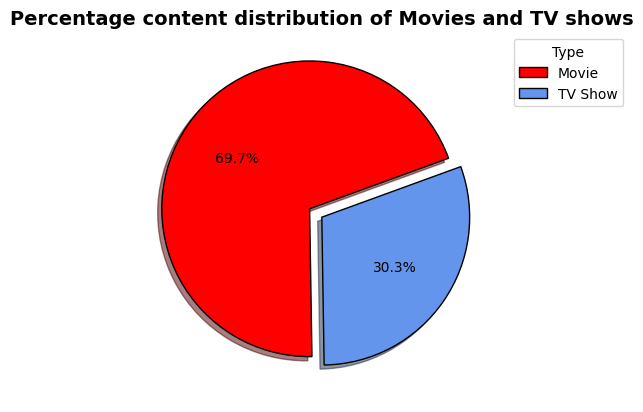

In [ ]:
types = df.type.value_counts()
plt.pie(types, autopct='%1.1f%%' , colors = ['red','cornflowerblue'],
startangle=20,
explode=(0.1, 0),
shadow=True,
wedgeprops={'edgecolor': 'black'})
plt.legend(types.index, title="Type", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage content distribution of Movies and TV shows',fontsize=14, fontweight='bold')
plt.show()


We can see that movies are the dominating content form in Netflix, making up for 69.7% of the content. TV shows form the remaining 30.3% of the content.




* Trend of the total number of Movies and TV shows added on a yearly basis :

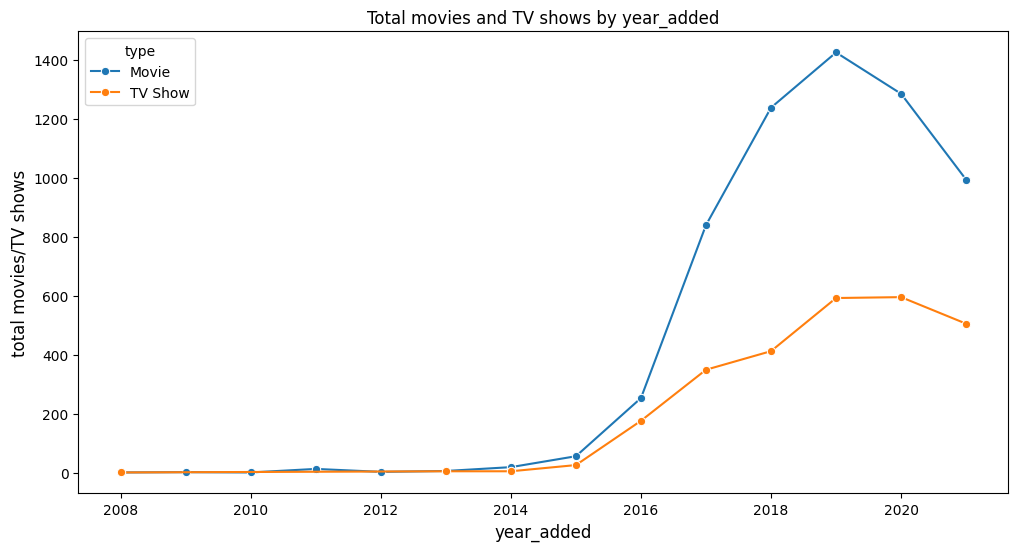

In [ ]:
d= df.groupby(['date_added_year' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'date_added_year' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('Total movies and TV shows by year_added' , fontsize = 12)
plt.show()


Insights :

1. The content added on Netflix increased drastically after 2015.
2. The highest number of movies and TV shows were added on Netflix in 2019.
3. In the years 2020 and 2021, we has see a drop in the content added on Netflix, possibly because of pandemic.
4. More preference was given to Movies after 2014.

* Total movies directed by top 10 directors

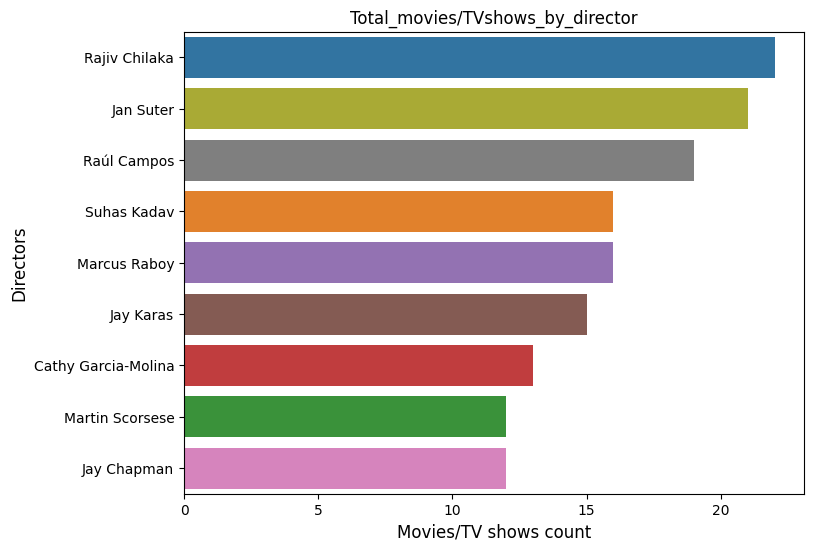

In [ ]:
top_10_dir = dir.director.value_counts().head(10).index.drop('Not Specified')
df_new = dir.loc[dir['director'].isin(top_10_dir)]

plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v', hue='director')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Insight :
 The top 3 directors with the highest number of releases are Rajiv Chilaka, Jan Suter, Raúl Campos.

* Total Movies/ TV shows per country :

In [ ]:
top_10 = country.country.value_counts().head(10).index.drop('Unknown')
df_new = country.loc[country['country'].isin(top_10)]

x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
South Korea,61,170


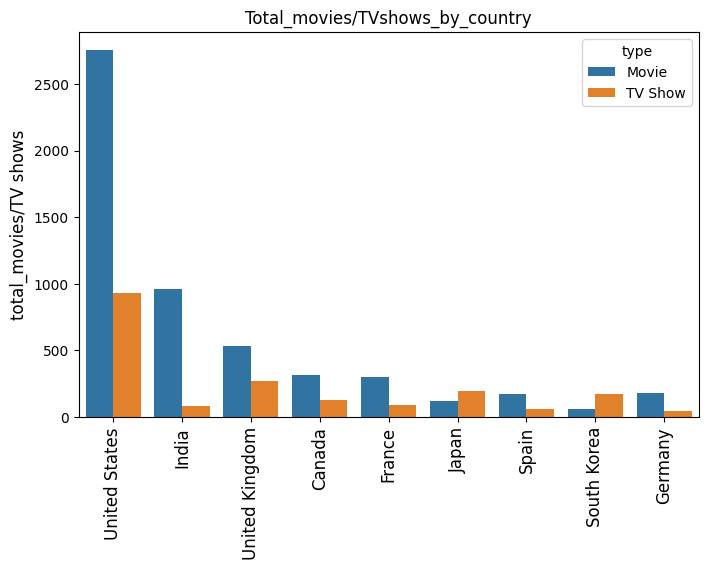

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10, hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

Insights :
1. We can observe that the US produces the highest number of Movies and TV shows.
2. India and the UK follow the US, but the amount of content produced by India is lesser than half of that of US in both Movies and TV shows.

* Total content distribution by release year of the content

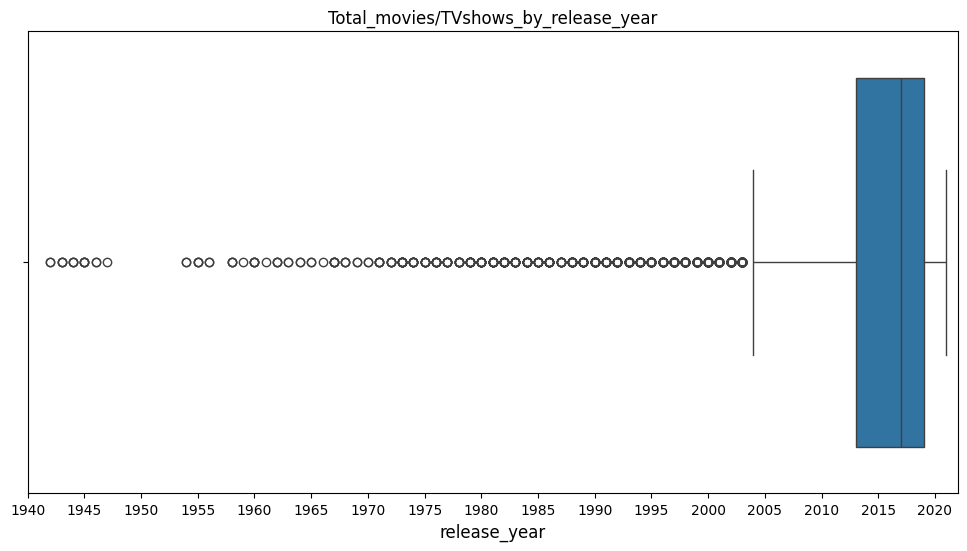

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

Insight:
Most of the content released by Netflix is within the range of 2000-2021

* Total movies/TV shows distribution by duration of the content

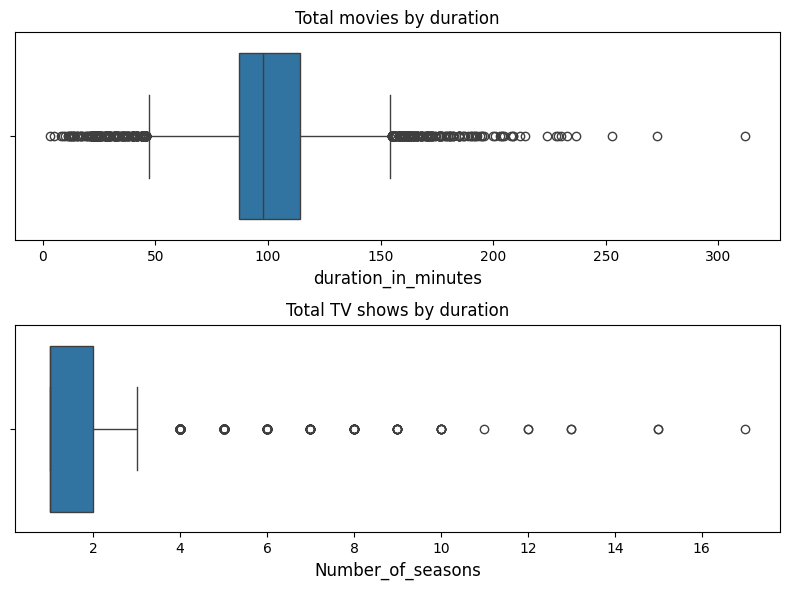

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')
sns.boxplot (data = tv_show , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

Insights :

* Movies : Median Duration: The median duration for movies is around 100 minutes. IQR: The interquartile range (IQR) is relatively large, indicating
a significant spread in movie durations. Outliers: There are several outliers, particularly on the right side of the box plot, suggesting some
movies have significantly longer durations. Distribution: The distribution is skewed to the right, with a longer tail on the right side. This
means there are more movies with longer durations compared to shorter ones.

* TV Shows : Median Duration: The median duration for TV shows is around 4 minutes. IQR: The IQR is relatively small, indicating a narrower range of
TV show durations. Outliers: There are fewer outliers compared to movies, suggesting a more concentrated distribution. Distribution: The
distribution appears to be roughly symmetrical, with a slight skew to the right.



Total number of Movies and TV shows per genre

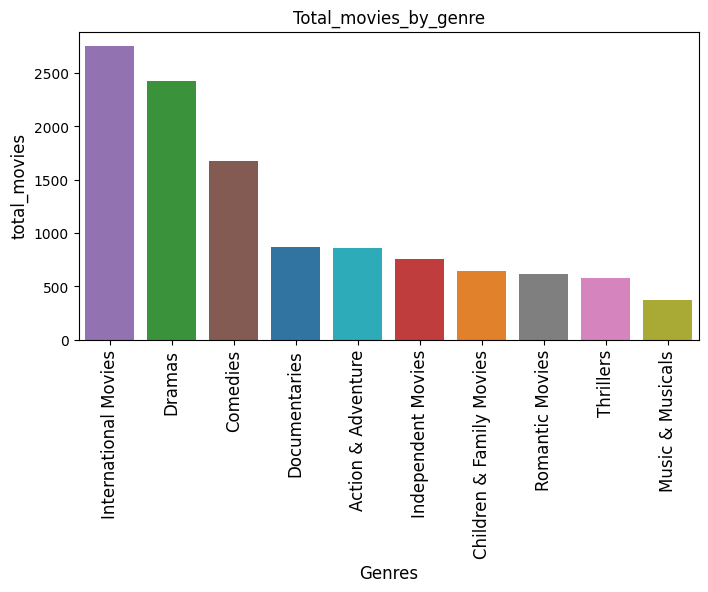

In [ ]:
top_10_movie_genres = genre[genre['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre.loc[genre['listed_in'].isin(top_10_movie_genres)]

top_10_TV_genres = genre[genre['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre.loc[genre['listed_in'].isin(top_10_TV_genres)]

plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres, hue='listed_in')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

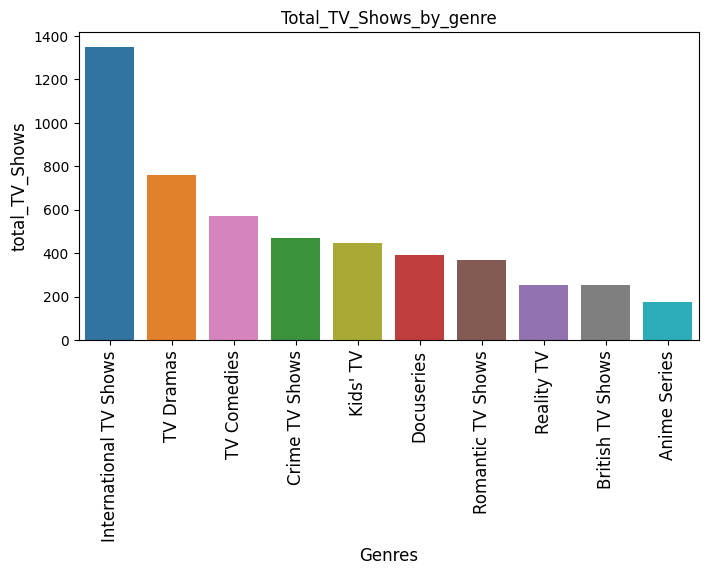

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres, hue='listed_in')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

## Bivariate Analysis

* Popular genres in top 10 countries

Text(0.5, 1.0, 'Countries by Genres')

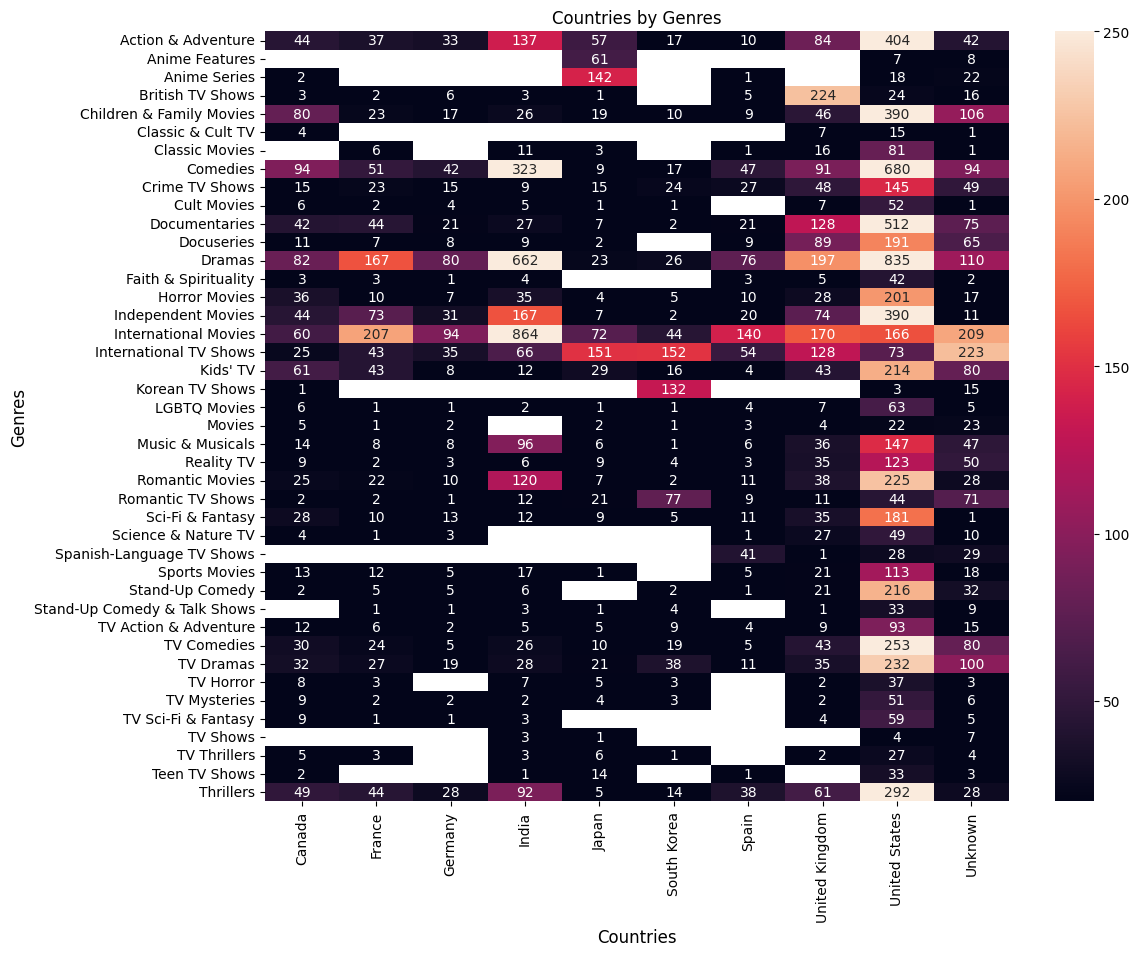

In [ ]:
top_10_country = country.country.value_counts().head(10).index
top_10_country = country.loc[country['country'].isin(top_10_country)]


x = top_10_country.merge(genre , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries by Genres' , fontsize = 12)

Insights:
We can observe that Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers are the popular genres across countries

There are a few country specific content as well, like Korean TV shows, British TV Shows, Spanish language TV Shows etc

The highest number of Int'l movies are produced in India

* Countrywise Rating of content

Text(0.5, 1.0, 'Countries V/s Rating')

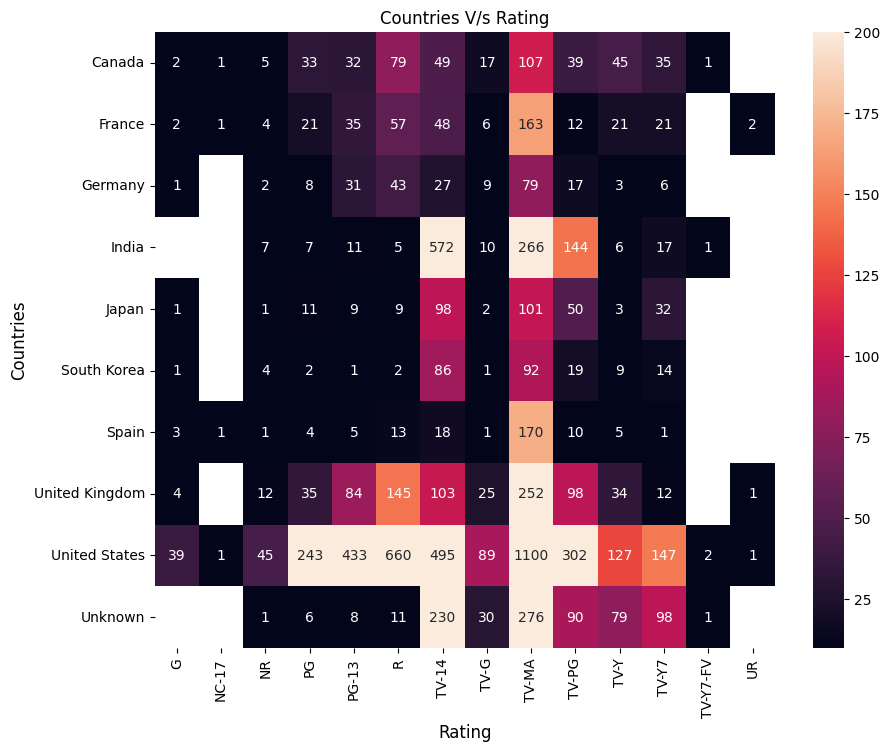

In [ ]:
x = top_10_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

Insights:
We can see that Netflix has a large amount of adult content across all countries (TV-MA & TV-14).
India also has many titles rated TV-PG, other than TV-MA & TV-14.
India does not have content for young audiences. Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).


* Top actors by country


In [ ]:
x = cast.merge(country , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)
top_5_actors




,country,cast,show_id
0,United States,Not Available,407
1,United States,Samuel L. Jackson,22
2,United States,Tara Strong,22
3,United States,Fred Tatasciore,21
4,United States,Adam Sandler,20
5,India,Anupam Kher,40
6,India,Not Available,39
7,India,Shah Rukh Khan,34
8,India,Naseeruddin Shah,31
9,India,Om Puri,29


* Top 5 genres in every country

In [ ]:
x = genre.merge(country , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Independent Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


* Time of the year when maximum content is added on Netflix

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

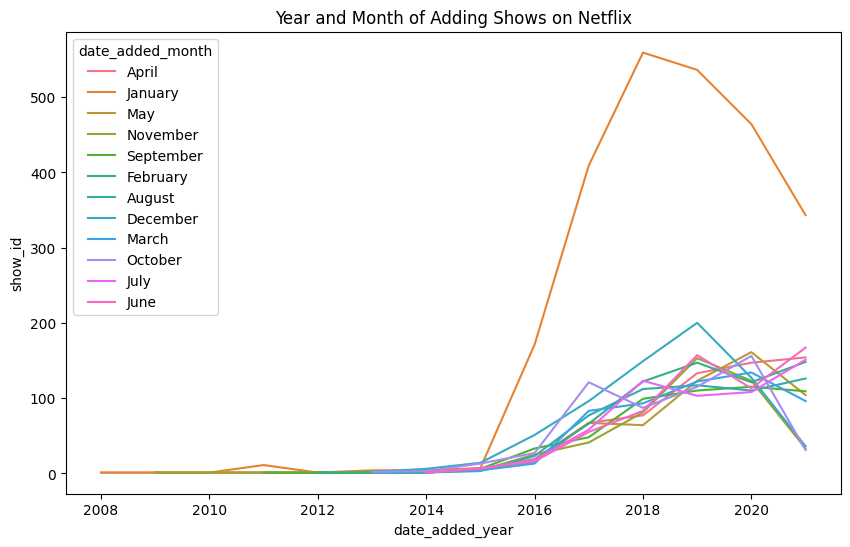

In [ ]:
month_year = df.groupby(['date_added_year' , 'date_added_month'])['show_id'].count().reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'date_added_year', y = 'show_id', hue='date_added_month')
plt.title('Year and Month of Adding Shows on Netflix')

Insights :

The number of shows getting added is increasing with each year until 2020.
We can also observe that the months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year.

# Insights Summary :
* Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
* The audience is favouring shorter duration content (duration of 75 to 150 minutes for movies and just seasons 1 to 3 for TV shows)

* There is a drop in content seen across all the countries in both TV shows and Movies in year 2020 and 2021, possibly because of Pandemic.
* Majority of the content was released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix.
* Around 70% content on Netflix is Movies and around 30% content is TV shows.
* Netflix has movies from a total of 123 countries, United States being the highset contributor with almost 37% of all the content.

# Recommendation Summary :

* Its better to produce shorter duration content as the audience is not preferring longer duration content.

* Adding more movies that were released prior to 2000 may attract more senior citizens towards Netflix.

* More focus has to be given on region specific content (like Korean TV shows, British TV Shows, Spanish language TV Shows etc). It can attract more regional audience into this service.